In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.integrate import odeint, quad, simpson
from scipy.interpolate import interp1d
from scipy.misc import derivative

CA is  0.012393764240595923
CB is  2.6928296390844064
Fraction approximated using trapezoid rule is about 0.229


C:\Users\schuy\AppData\Local\Temp\ipykernel_36072\1982261270.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  fracint = quad(dNBdt,0,15)


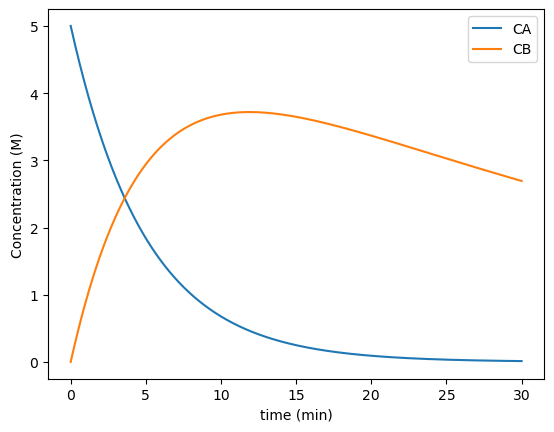

In [8]:
VR = 100000 #cm^3
kCB = 2
k = .2
CA0 = 5
D = (VR/(np.pi/2))**(1/3)
As = 1244.1
def rates(C,t):
    CA = C[0]
    CB = C[1]
    r = k*CA
    return np.array([-r,r-kCB*CB*As/VR])
zeroes = np.array([CA0,0])
t = np.linspace(0,30,500)
abc = odeint(rates,zeroes,t)
CA = abc[:,0]
CB = abc[:,1]
print("CA is ",CA[499])
print("CB is ",CB[499])
plt.plot(t,CA)
plt.plot(t,CB)
plt.legend(["CA","CB"])
plt.xlabel("time (min)")
plt.ylabel("Concentration (M)")


t2 = np.linspace(0,15,500)
dNBdt = interp1d(t2,kCB*CB*As/VR)
#print(abc2)
fracint = quad(dNBdt,0,15)
frac = fracint[0]/CA0
print("Fraction approximated using trapezoid rule is about",'%.3f'%frac)